In [0]:
#!pip install tensorflow==2.0.0-rc0

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 501kB 44.7MB/s 
     |████████████████████████████████| 4.3MB 53.1MB/s 


In [0]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [0]:
classes_name = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [0]:
classes_name

['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

In [0]:
X_train.max()

255

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

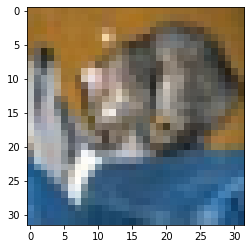

In [0]:
plt.imshow(X_test[0])

In [0]:
y_test[0]

array([3], dtype=uint8)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding='same', activation='relu', input_shape=[32,32,3]))
model.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 1.4085 - sparse_categorical_accuracy: 0.4912 - val_loss: 1.0951 - val_sparse_categorical_accuracy: 0.6146
Epoch 2/10
50000/50000 [==============================] - 216s 4ms/sample - loss: 1.0805 - sparse_categorical_accuracy: 0.6185 - val_loss: 1.0127 - val_sparse_categorical_accuracy: 0.6375
Epoch 3/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 0.9691 - sparse_categorical_accuracy: 0.6596 - val_loss: 0.9455 - val_sparse_categorical_accuracy: 0.6699
Epoch 4/10
50000/50000 [==============================] - 216s 4ms/sample - loss: 0.8921 - sparse_categorical_accuracy: 0.6860 - val_loss: 0.9224 - val_sparse_categorical_accuracy: 0.6740
Epoch 5/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 0.8352 - sparse_categorical_accuracy: 0.7062 - val_loss: 0.8836 - val_sparse_categorical_accuracy: 0.6918
Epoch 6/10

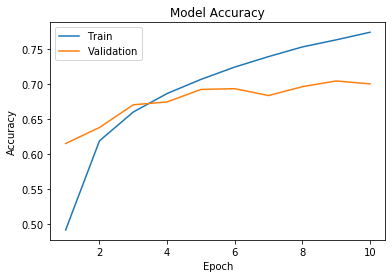

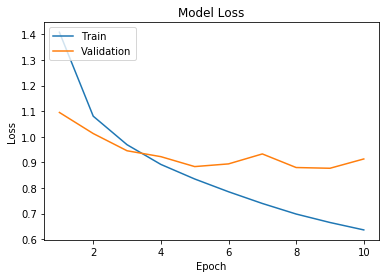

In [0]:
# Plot Training and validation accuracy values

epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

# Plot Training and validation loss values

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f29c44c09e8>)

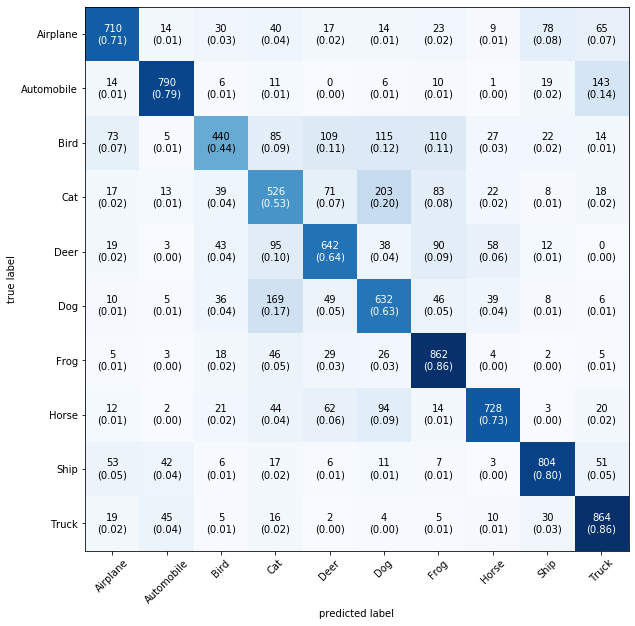

In [0]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat, figsize=(10, 10), class_names = classes_name, show_normed=True)